# Anagrams Analytics

This notebook provides analytics for anagrams task using the indexer data structure table built for fast retrieval method

### Retrieve all anagrams

In [2]:
import json
from solutions import FastRetrievalIndexer

with open('words.txt', 'r') as file_words:
    words = [word.strip() for word in file_words.readlines()]
indexer_table = FastRetrievalIndexer().perform_indexing(words)

anagrams_list = []
for hash, freq_table in indexer_table.items():
    for hist, anagrams in freq_table.items():
        if len(anagrams) > 1:
            anagrams_list.append(anagrams)
    
anagrams_list

[['bestir', 'biters', 'tribes'],
 ['lasting', 'salting'],
 ['state', 'taste'],
 ['clods', 'colds', 'scold'],
 ['babbling', 'blabbing'],
 ['ideals', 'ladies', 'sailed'],
 ['net', 'ten'],
 ['vale', 'veal'],
 ['blow', 'bowl'],
 ['climaxes', 'exclaims'],
 ['angrier', 'earring', 'rearing'],
 ['hurdle', 'hurled'],
 ['nest', 'nets', 'sent', 'tens'],
 ['aces', 'case'],
 ['leap', 'pale', 'peal', 'plea'],
 ['braid', 'rabid'],
 ['caiman', 'maniac'],
 ['coil', 'loci'],
 ['paled', 'pedal', 'plead'],
 ['rust', 'ruts'],
 ['lapse', 'leaps', 'pales', 'peals', 'pleas'],
 ['anemic', 'cinema'],
 ['Carla', 'Clara'],
 ['cashed', 'chased'],
 ['cashes', 'chases'],
 ['dealings', 'leadings', 'signaled'],
 ['seated', 'sedate', 'teased'],
 ['tired', 'tried'],
 ['cashing', 'chasing'],
 ['form', 'from'],
 ['meander', 'renamed'],
 ['pate', 'peat', 'tape'],
 ['Eire', 'Erie'],
 ['brute', 'tuber'],
 ['brutes', 'buster', 'tubers'],
 ['caret', 'cater', 'crate', 'react', 'recta', 'trace'],
 ['peaks', 'speak'],
 ['vein', '

### Distribution of number of anagrams

This shows distribution of number of anagrams, for example anagrams with two words are more than 80% of all anagrams and only one anagrams list with 7 words

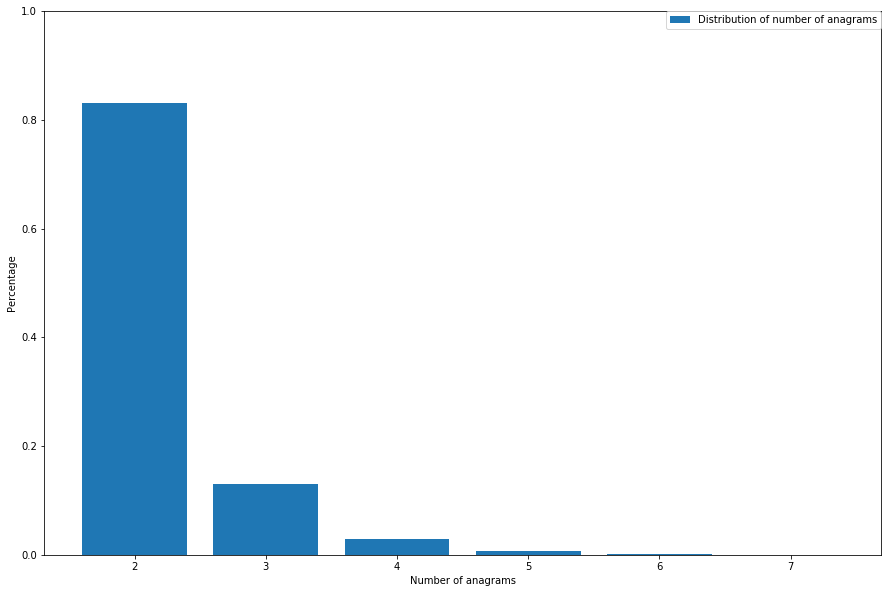

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


frequency = {}
for entry in anagrams_list:
    anagrams_count = len(entry)
    if anagrams_count in frequency:
        frequency[anagrams_count] += 1
    else:
        frequency[anagrams_count] = 1

def plot_hist(freq_table, label, xlab, ylab):
    keys = freq_table.keys()
    vals = freq_table.values()

    plt.bar(list(keys), np.divide(list(vals), sum(vals)), label=label)
    plt.ylim(0,1)
    plt.ylabel (ylab)
    plt.xlabel (xlab)
    plt.xticks(list(keys))
    plt.legend (bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=0.)
    plt.show()

plt.rcParams["figure.figsize"] = (15,10)
plot_hist(frequency, 'Distribution of number of anagrams', 'Number of anagrams', 'Percentage')

### Distribution of Alphabts in anagrams

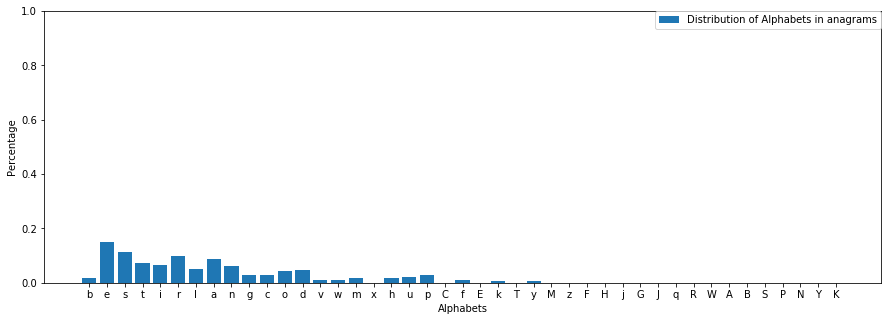

In [4]:
alphabets_dist = {}
for anagrams_entry in anagrams_list:
    for anagram in anagrams_entry:
        for c in anagram:
            if c in alphabets_dist:
                alphabets_dist[c] += 1
            else:
                alphabets_dist[c] = 1
alphabets_dist

plt.rcParams["figure.figsize"] = (15,5)
plot_hist(alphabets_dist, 'Distribution of Alphabets in anagrams', 'Alphabets', 'Percentage')

### Probability of finding anagrams by character

Given a word w, what is the probaility of finding equivalent anagrams based on starting character
For example words starts with 'S' letter are more likely to have anagrams than 'E' based on below plot

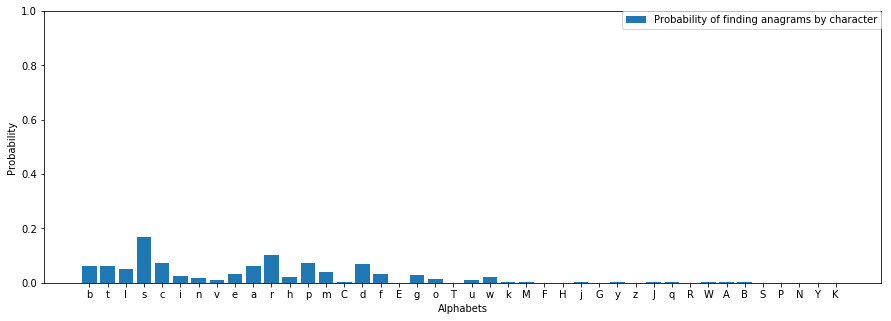

In [5]:
first_alphabets_dist = {}
for anagrams_entry in anagrams_list:
    for anagram in anagrams_entry:
        first_char = anagram[0]
        if first_char in first_alphabets_dist:
            first_alphabets_dist[first_char] += 1
        else:
            first_alphabets_dist[first_char] = 1

plt.rcParams["figure.figsize"] = (15,5)
plot_hist(first_alphabets_dist, 'Probability of finding anagrams by character', 'Alphabets', 'Probability')

### Word Size vs Number of anagrams

A scatter plot of word size vs. number of anagrams, we can see from plot it's a skewed normal distribution with word size of 5 has highest number of anagrams

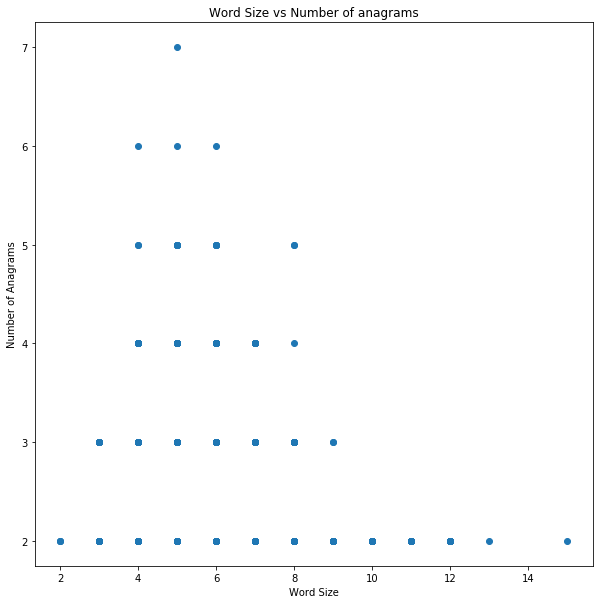

In [6]:
word_size_by_anagrams_number = []
for anagrams_entry in anagrams_list:
    word_size = len(anagrams_entry[0])
    anagrams_number = len(anagrams_entry)
    word_size_by_anagrams_number.append((word_size, anagrams_number))

plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(*zip(*word_size_by_anagrams_number))
plt.title('Word Size vs Number of anagrams')
plt.xlabel('Word Size')
plt.ylabel('Number of Anagrams')
plt.show()